# Computer Vision LAB 1 Report 

## Task 1

In [117]:
import cv2
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt

**Task code**

In [118]:
def loadImage(filename):
    
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    # Check for success
    if img is None:
        print('Failed to open', filename)
        return
    return img

def convolve(img, kernel):
    (rows, columns) = img.shape
    kernelSize = kernel.shape[0]
    resultImg = np.empty(shape=(rows, columns), dtype=np.float32)
    padSize = int((kernelSize - 1) / 2)
    # Use intermediate padded array, to not mutate original array
    # Pad array
    intermediate = np.pad(img, pad_width=((padSize, padSize), (padSize, padSize)), constant_values=0)
    # Iterate through pixels
    # Modify start iterator to go through non pad values
    for rowI in range(padSize, rows + padSize):
        for columnI in range(padSize, columns + padSize):
            # Get kernel sized slice
            imgSlice = intermediate[rowI - padSize:rowI + padSize + 1, columnI - padSize:columnI + padSize + 1]
            mulRes = np.multiply(imgSlice, kernel)
            resultImg[rowI - padSize][columnI - padSize] = np.sum(mulRes)
    return resultImg

Image results for convolving with either average or weighted average blur kernel

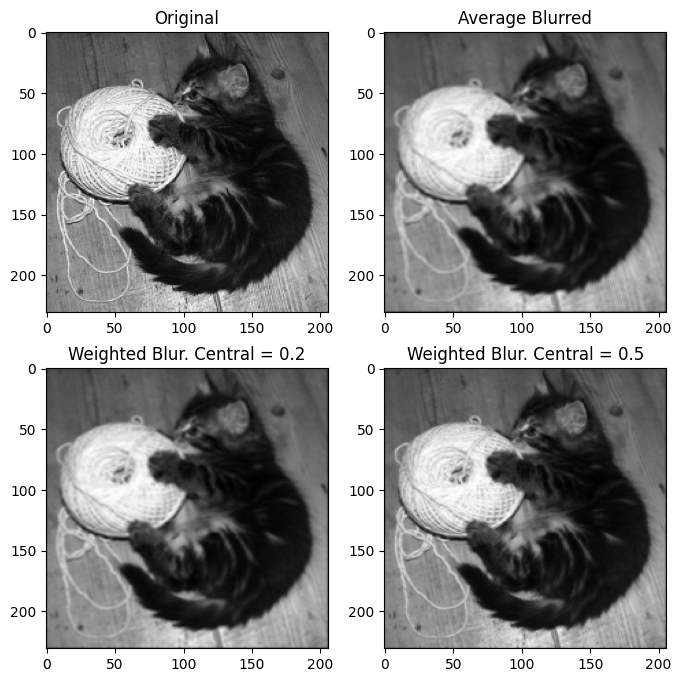

In [119]:
def blurKitty():
    fig = plt.figure(figsize=(8, 8))
    img = loadImage("kitty.bmp")
    plt.subplot(2, 2, 1)
    plt.title("Original")
    plt.imshow(img, 'grey', aspect='auto')
    averageBlurKernel = np.asanyarray([
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9 ]
    ], dtype=np.float32)
    averageBlurred = convolve(img, averageBlurKernel)
    plt.subplot(2, 2, 2)
    plt.title("Average Blurred")
    plt.imshow(averageBlurred, 'grey', aspect='auto')
    weightedBlurKernel = np.asanyarray([
        [0.1, 0.1, 0.1],
        [0.1, 0.2, 0.1],
        [0.1, 0.1, 0.1 ]
    ], dtype=np.float32)
    weightedBlurred = convolve(img, weightedBlurKernel)
    plt.subplot(2, 2, 3)
    plt.title("Weighted Blur. Central = 0.2")
    plt.imshow(weightedBlurred, 'grey', aspect='auto')
    weightedBlurKernel2 = np.asanyarray([
        [1/16, 1/16, 1/16],
        [1/16, 0.5, 1/16],
        [1/16, 1/16, 1/16 ]
    ], dtype=np.float32)
    weightedBlurred2 = convolve(img, weightedBlurKernel2)
    plt.subplot(2, 2, 4)
    plt.title("Weighted Blur. Central = 0.5")
    plt.imshow(weightedBlurred2, 'grey', aspect='auto')
    plt.show()
blurKitty()

## Task 2

**Task Code**

In [120]:
def getEdges(img, weight):
    horizontalDiffKernel = np.asanyarray([
        [-1     , 0, 1],
        [-weight, 0, weight],
        [-1     , 0, 1 ]
    ], dtype=np.float32)
    verticalDiffKernel = np.asanyarray([
        [-1, -weight, -1],
        [0, 0       , 0],
        [1  , weight, 1 ]
    ], dtype=np.float32)
    horizontalEdges = convolve(img, horizontalDiffKernel)
    # For this exercise we don't care about edge directions so take the absolute
    # Clamp to max greyscale value of 255 to prevent overflow
    horizontalEdges = np.minimum(np.abs(horizontalEdges), np.full(horizontalEdges.shape, 255)).astype(np.uint8)
    verticalEdges = convolve(img, verticalDiffKernel)
    verticalEdges = np.minimum(np.abs(verticalEdges), np.full(verticalEdges.shape, 255)).astype(np.uint8)
    return horizontalEdges, verticalEdges

def getGradientMagnitudes(horizontalEdges, verticalEdges):
    resultImg = np.empty(shape=horizontalEdges.shape, dtype=np.uint8)
    (rows, columns) = horizontalEdges.shape
    for rowI in range(rows):
        for columnI in range(columns):
            horizontalMagnitude = horizontalEdges[rowI][columnI]
            verticalMagnitude = verticalEdges[rowI][columnI]
            # Clamp to max greyscale value of 255 to prevent overflow
            resultImg[rowI][columnI] = min(255, sqrt(horizontalMagnitude ** 2 + verticalMagnitude ** 2))
    return resultImg


Image results for horizontal and vertical edge strengths either average or weighted average

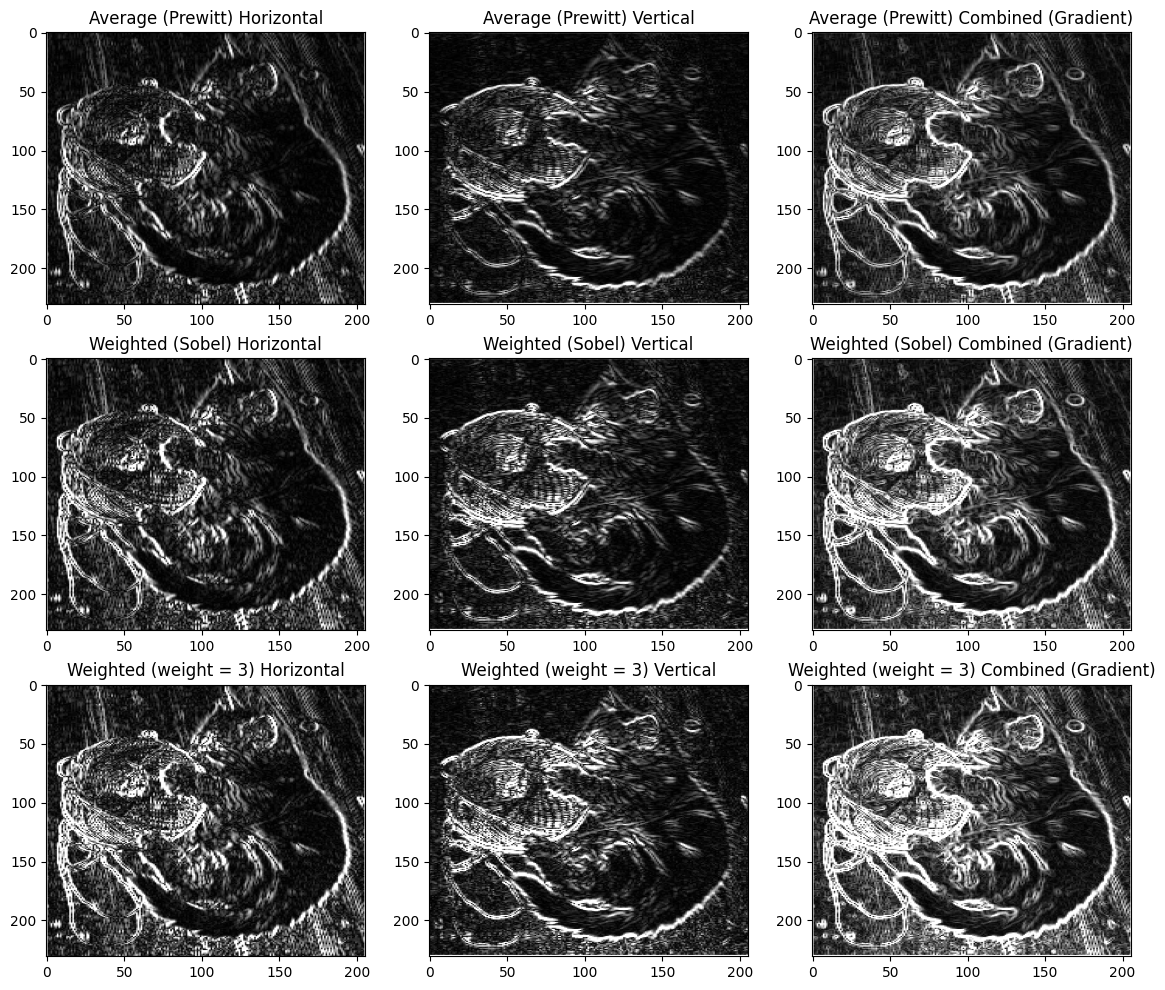

In [121]:
def getKittyEdges():
    fig = plt.figure(figsize=(14, 12))
    img = loadImage("kitty.bmp")
    h1, v1 = getEdges(img, 1)
    g1 = getGradientMagnitudes(h1, v1)
    plt.subplot(3, 3, 1)
    plt.title("Average (Prewitt) Horizontal")
    plt.imshow(h1, 'grey', aspect='auto' )
    plt.subplot(3, 3, 2)
    plt.title("Average (Prewitt) Vertical")
    plt.imshow(v1, 'grey', aspect='auto' )
    plt.subplot(3, 3, 3)
    plt.title("Average (Prewitt) Combined (Gradient)")
    plt.imshow(g1, 'grey', aspect='auto')

    h2, v2 = getEdges(img, 2)
    g2 = getGradientMagnitudes(h2, v2)
    plt.subplot(3, 3, 4)
    plt.title("Weighted (Sobel) Horizontal")
    plt.imshow(h2, 'grey', aspect='auto' )
    plt.subplot(3, 3, 5)
    plt.title("Weighted (Sobel) Vertical")
    plt.imshow(v2, 'grey', aspect='auto' )
    plt.subplot(3, 3, 6)
    plt.title("Weighted (Sobel) Combined (Gradient)")
    plt.imshow(g2, 'grey', aspect='auto')

    h3, v3 = getEdges(img, 3)
    g3 = getGradientMagnitudes(h3, v3)
    plt.subplot(3, 3, 7)
    plt.title("Weighted (weight = 3) Horizontal")
    plt.imshow(h3, 'grey', aspect='auto' )
    plt.subplot(3, 3, 8)
    plt.title("Weighted (weight = 3) Vertical")
    plt.imshow(v3, 'grey', aspect='auto' )
    plt.subplot(3, 3, 9)
    plt.title("Weighted (weight = 3) Combined (Gradient)")
    plt.imshow(g3, 'grey', aspect='auto')
    plt.show()
    return g1, g2, g3

g1, g2, g3 = getKittyEdges()

## Task 3

**Task Code**

In [ ]:
def threshold(img, threshold):
    MAX_VAL = 255
    MIN_VAL = 0
    (rows, columns) = img.shape
    resultImg = np.empty(img.shape, dtype=np.uint8)
    for rowI in range(rows):
        for columnI in range(columns):
            val = img[rowI][columnI]
            resultImg[rowI][columnI] = MAX_VAL if val >= threshold else MIN_VAL